In [1]:
import pandas as pd 
import datetime as dt
import numpy as np

In [2]:
# Borrar columnas 
diccionario_de_conversion = {
    'fecha_hora_creacion': 'datetime64[ns]',
    'fecha_hora_cierre': 'datetime64[ns]', 
    'codigo_cierre': 'category',
    'delegacion_inicio': 'category',
    'incidente_c4': 'category', 
    'clas_con_f_alarma': 'category', 
    'tipo_entrada': 'category',
    'delegacion_cierre':'category',
    'mes':'category'
}

In [3]:
df = pd.read_csv('data/incidentes-viales-c5-limpio.csv', sep='$', index_col=0)
df = df.astype(diccionario_de_conversion);

1. ¿En qué delegación hay más accidentes?
2. ¿Cómo se termina el proceso de seguimiento a los accidentes?
3. ¿Cómo reportan los accidentes?

### ¿En qué delegación hay más accidentes?

<AxesSubplot:title={'center':'Accidentes por delegación del 2016 al 2021'}, ylabel='delegacion_inicio'>

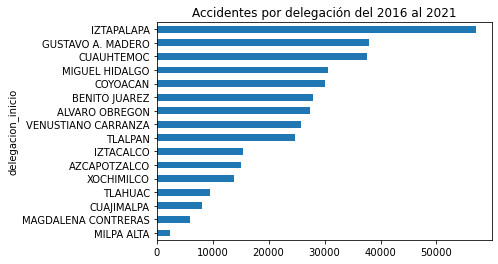

In [56]:
# En que delegación hay más accidentes por año
top_delegaciones = df.groupby('delegacion_inicio').size().sort_values(ascending=False).index.to_list()
top_5_delegaciones = top_delegaciones[:6]

df.groupby('delegacion_inicio').size().sort_values(ascending=True).plot(kind='barh', title='Accidentes por delegación del 2016 al 2021')

<AxesSubplot:title={'center':'Accidentes por delegacion Top 5'}, xlabel='fecha_hora_creacion'>

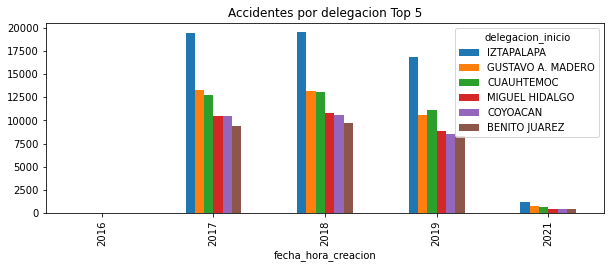

In [51]:
accidentes_por_delegacion_por_anio = df.groupby(['delegacion_inicio',df['fecha_hora_creacion'].dt.year]).size().sort_values(ascending=False)

accidentes_por_delegacion_por_anio.loc[(top_5_delegaciones)].unstack(level=0).plot(kind='bar', subplots=False, figsize=(10,3.5), title='Accidentes por delegacion Top 5')

### ¿Cómo reportan los accidentes?

<AxesSubplot:title={'center':'Forma de levantamiento del 2016 al 2021'}, ylabel='tipo_entrada'>

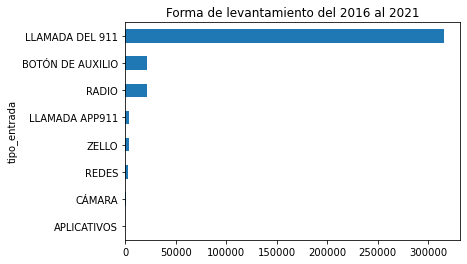

In [55]:
top_tipo_entrada = df.groupby('tipo_entrada').size().sort_values(ascending=False).index.to_list()
top_5_tipo_entrada = top_tipo_entrada[:5]
df.groupby('tipo_entrada').size().sort_values(ascending=True).plot(kind='barh', title='Forma de levantamiento del 2016 al 2021')

In [ ]:
top_tipo_entrada = df.groupby('tipo_entrada').size().sort_values(ascending=False).index.to_list()

df.groupby('tipo_entrada').size().sort_values(ascending=True).plot(kind='barh', title='Forma de levantamiento del 2016 al 2021')

### ¿Cómo reportan los accidentes por delegación?

In [6]:
via_reporte_por_delegacion = df.groupby(['tipo_entrada', 'delegacion_inicio']).size()

<AxesSubplot:title={'center':'Tipo de levantamiennto por delegación 2016 al 2021'}, xlabel='delegacion_inicio'>

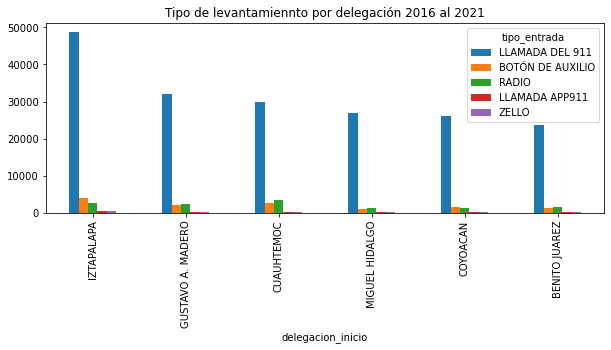

In [57]:
via_reporte_por_delegacion.loc[(top_5_tipo_entrada, top_5_delegaciones)].unstack(level=0).plot(kind='bar', subplots=False, figsize=(10,3.5), title="Tipo de levantamiennto por delegación 2016 al 2021")

### ¿Cómo se termina el proceso de seguimiento a los accidentes por delegacion de inicio y de cierre?

In [8]:
# Agregar columnas auxiliares delta de tiempo
df['delta_timedate'] = (df['fecha_hora_cierre'] - df['fecha_hora_creacion'])
df['delta_hours'] = (df['fecha_hora_cierre'] - df['fecha_hora_creacion']).astype('timedelta64[h]')

In [9]:
print(f"El tiempo más corto en cerrar un caso fue: {df['delta_timedate'].min()}")
print(f"El tiempo más largo en cerrar un caso fue: {df['delta_timedate'].min()}")
print(f"El tiempo promedio en cerrar un caso fue: {df['delta_timedate'].mean()}")

El tiempo más corto en cerrar un caso fue: -323 days +00:13:41
El tiempo más largo en cerrar un caso fue: -323 days +00:13:41
El tiempo promedio en cerrar un caso fue: 0 days 00:52:08.401849545


<AxesSubplot:title={'center':'Tiempo promedio de culmino por delegación'}, ylabel='delegacion_inicio'>

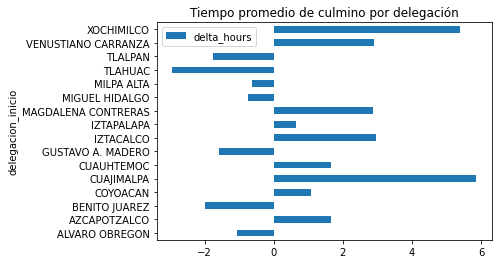

In [58]:
 # Tiempo promedio de respuesta por delegación en horas
 (df[df['delegacion_inicio'] == df['delegacion_cierre']])[['delegacion_inicio','delta_hours']].groupby('delegacion_inicio').mean().plot(kind='barh', title="Tiempo promedio de culmino por delegación")

In [13]:
# Indices de los casos que fueron resultos en la misma delegación de origen
indices_resuleto_en_delegacion = df[df['delegacion_inicio'] == df['delegacion_cierre']].index
# Crear una columna booleana si fué resulto en la misma delegación
df['resuelto_en_delegacion'] = df.index.map(lambda x: x in indices_resuleto_en_delegacion)

<AxesSubplot:title={'center':'Casos resueltos en la misma delegación'}, xlabel='delegacion_inicio'>

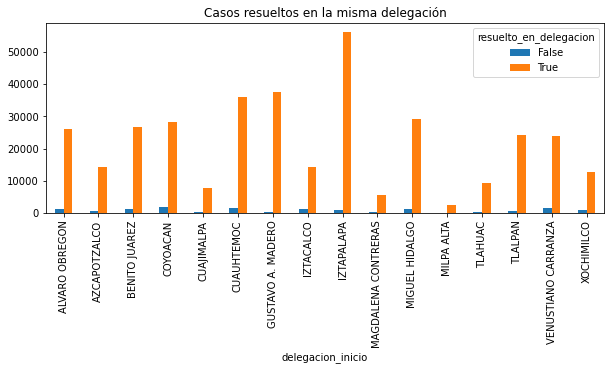

In [59]:
df.groupby(['resuelto_en_delegacion','delegacion_inicio']).size().unstack(level=0).plot(kind='bar', subplots=False, figsize=(10,3.5), title="Casos resueltos en la misma delegación")